In [165]:
import mysql.connector
from sqlalchemy import create_engine
import csv
import pandas as pd
import matplotlib.pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


## Variables de conexion base de datos y sus métodos de conexión

In [ ]:
host='localhost'
database='bdProyectoBD_215215639'
user='root'
port = '3306'
password = "Lapicero.5"
## Otras variables
rutaArchivoCSV = "./bd.csv"
resultadoConsulta = []
listas = []

In [ ]:
def abrirConexionBD():
 
    try:
        conn = mysql.connector.connect(
            host=host,
            database= database,
            user= user,
            password=password)
   
        if conn.is_connected():
            db_Info = conn.get_server_info()
            return  conn
            
    except Error as e:
        print("Error al conectar a MySQL", e)    

In [ ]:
def cerrarConexionBD():
 
    try:
        conn = mysql.connector.connect(
            host=host,
            database= database,
            user= user,
            password=password)
            
        if conn.is_connected():
            connection.close()

    except Error as e:
        print("Error al conectar a MySQL", e) 

In [ ]:
df = pd.read_csv(rutaArchivoCSV)
df = df.head(100)
df.shape

In [ ]:
def insertarTablaRelaciones():
    # Crea la cadena de conexión
    cadena_conexion = f'mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}'

    # Crea el motor de SQLAlchemy
    motor = create_engine(cadena_conexion)

    # Inserta el DataFrame en la base de datos
    df.to_sql('EgresosaHospital', con=motor, if_exists='replace', index=False)

insertarTablaRelaciones()

In [ ]:
conn = abrirConexionBD()

In [161]:
def ejecutarConsulta(conexion):

    cursor = conexion.cursor()
    
    query = '''
                SELECT 
                    eh.claveUsuario,
                    eh.fechaRegistro,
                    eh.edadEgreso,
                    eh.diasEstancia,
                    i.nombre,
                    me.motivo,
                    it.intervalo_tiempo,
                    s.sexo,
                    ge.grupo_edad
                FROM
                    EgresosaHospital AS eh
                        INNER JOIN
                    Instituciones AS i ON eh.idInstitucion = i.id
                        INNER JOIN
                    MotivosEgreso AS me ON eh.idMotivoEgreso = eh.idMotivoEgreso
                        INNER JOIN
                    IntervalosTiempos AS it ON eh.idIntervaloTiempos = it.indice
                        INNER JOIN
                    Sexos AS s ON eh.idSexo = s.id
                        INNER JOIN
                    GruposEdades AS ge ON eh.idGruposEdades = ge.id;
    '''

    cursor.execute(query)
    
    resultadoConsulta = cursor.fetchall()
    cursor.close()
    
    print(resultadoConsulta)

    listas = [list(tupla) for tupla in resultadoConsulta]
    
    print(listas)

    columns = ['ID', 'FechaRegistro', 'EdadEgreso', 'DiasEstancia', 'Institución',
     'MotivoEgreso', 'DuracionEstancia', 'Género', 'RangoEdad']

    dfCualitativo = pd.DataFrame(listas, columns=columns)

    return dfCualitativo


dfCualitativo = ejecutarConsulta(conn)

[(2500286, '01/05/22', 55, 34, 'ISSSTE', 'CURACIÓN', '1 Bimestre', 'MUJER', '45 a 64 años'), (2500346, '01/05/22', 14, 27, 'ISSSTE', 'CURACIÓN', '1 Mes', 'HOMBRE', '05 a 14 años'), (2500341, '01/06/22', 43, 26, 'ISSSTE', 'CURACIÓN', '1 Mes', 'MUJER', '15 a 44 años'), (2500142, '01/05/22', 70, 23, 'ISSSTE', 'CURACIÓN', '1 Mes', 'MUJER', '65 y más años'), (2500502, '01/04/22', 73, 18, 'ISSSTE', 'CURACIÓN', '3 Semanas', 'MUJER', '65 y más años'), (2500167, '01/04/22', 34, 14, 'ISSSTE', 'CURACIÓN', '14 Días', 'HOMBRE', '15 a 44 años'), (2500268, '01/05/22', 67, 14, 'ISSSTE', 'CURACIÓN', '14 Días', 'MUJER', '65 y más años'), (2500305, '01/06/22', 57, 14, 'ISSSTE', 'CURACIÓN', '14 Días', 'HOMBRE', '45 a 64 años'), (2500442, '01/06/22', 86, 12, 'ISSSTE', 'CURACIÓN', '12 Días', 'MUJER', '65 y más años'), (2500381, '01/06/22', 75, 12, 'ISSSTE', 'CURACIÓN', '12 Días', 'MUJER', '65 y más años'), (2500487, '01/05/22', 25, 11, 'ISSSTE', 'CURACIÓN', '11 Días', 'MUJER', '15 a 44 años'), (2500120, '01

In [163]:
dfCualitativo.describe()

,ID,EdadEgreso,DiasEstancia
count,8.000000e+02,800.000000,800.000000
mean,2.500243e+06,52.760000,5.690000
std,1.401001e+02,20.875515,5.581473
min,2.500002e+06,1.000000,1.000000
25%,2.500144e+06,41.500000,2.000000
50%,2.500257e+06,57.000000,4.000000
75%,2.500335e+06,70.000000,7.000000
max,2.500527e+06,89.000000,34.000000


In [162]:
dfCualitativo.head()

,ID,FechaRegistro,EdadEgreso,DiasEstancia,Institución,MotivoEgreso,DuracionEstancia,Género,RangoEdad
0,2500286,01/05/22,55,34,ISSSTE,CURACIÓN,1 Bimestre,MUJER,45 a 64 años
1,2500346,01/05/22,14,27,ISSSTE,CURACIÓN,1 Mes,HOMBRE,05 a 14 años
2,2500341,01/06/22,43,26,ISSSTE,CURACIÓN,1 Mes,MUJER,15 a 44 años
3,2500142,01/05/22,70,23,ISSSTE,CURACIÓN,1 Mes,MUJER,65 y más años
4,2500502,01/04/22,73,18,ISSSTE,CURACIÓN,3 Semanas,MUJER,65 y más años


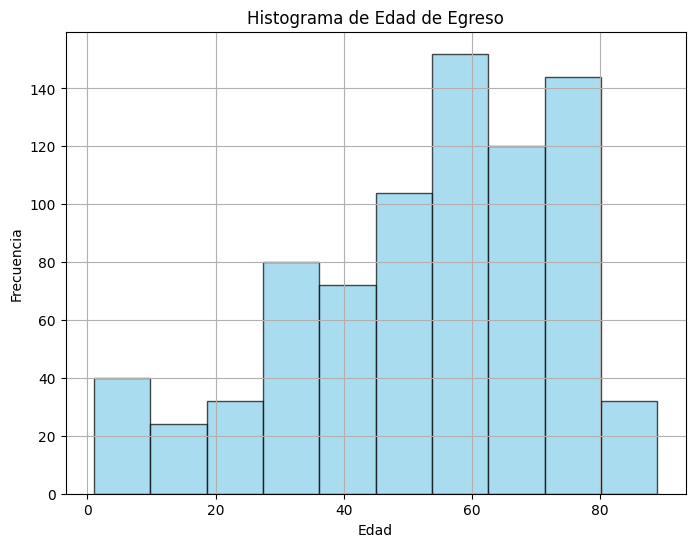

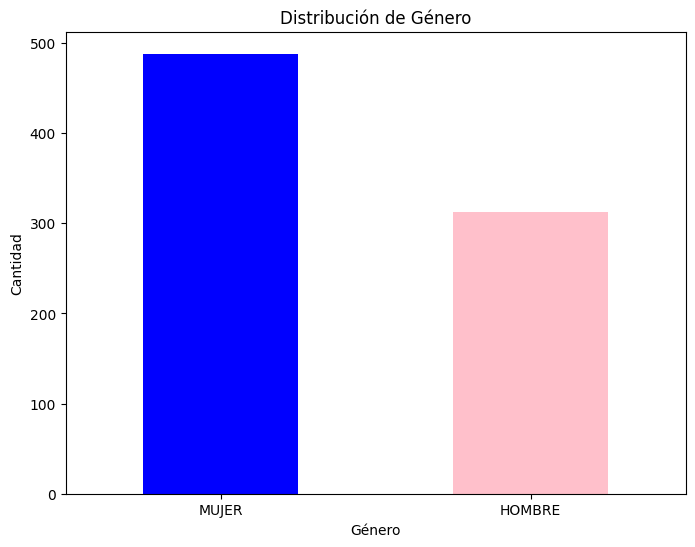

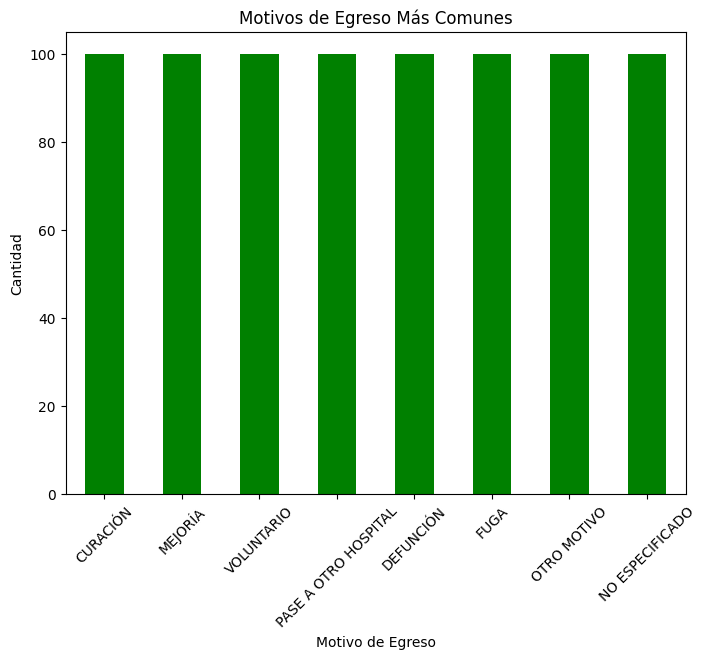

In [167]:

# 1. Histograma de la edad de egreso
plt.figure(figsize=(8, 6))
plt.hist(dfCualitativo['EdadEgreso'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Edad de Egreso')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# 2. Gráfico de barras de distribución de género
plt.figure(figsize=(8, 6))
dfCualitativo['Género'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()

# 4. Gráfico de barras de motivos de egreso más comunes
plt.figure(figsize=(8, 6))
dfCualitativo['MotivoEgreso'].value_counts().plot(kind='bar', color='green')
plt.title('Motivos de Egreso Más Comunes')
plt.xlabel('Motivo de Egreso')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()